<a href="https://colab.research.google.com/github/PunyabratSaikia/Covid-19-prediciton/blob/master/Covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing google drive to get access to the datasets
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:

# At first, we import all the necessary python packages

import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

#we create two lists,one for our images data and the other for their labels.

data = []
labels = []

#path to the dataset containing normal images in google drive
path = "/content/drive/My Drive/keras-covid-19/dataset/normal"

# looping over the images of normal-dataset
for file in os.listdir("/content/drive/My Drive/keras-covid-19/dataset/normal"):
	# setting label as '0' for normal images
	label = 0

	# loading the image,converting to rgb format and resizing to
	# 224x224 pixels while ignoring aspect ratio

	image = cv2.imread(path + '/' + file)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# updating the data and labels lists, respectively
	data.append(image)
	labels.append(label)

#path to the dataset containing covid-19 images in google drive
path1 = "/content/drive/My Drive/keras-covid-19/dataset/covid"

# looping over the images of covid-19-dataset
for file in os.listdir("/content/drive/My Drive/keras-covid-19/dataset/covid"):
	# setting label as '1' for covid images
	label = 1

  # loading the image,converting to rgb format and resizing to
	# 224x224 pixels while ignoring aspect ratio

	image = cv2.imread(path1+ '/' + file)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)


# converting the labels to one-hot-encode format
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

#viewing the labels as one-hot-encoded vectors
print(labels)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


[INFO] compiling model...
[INFO] training head...
Epoch 1/25
5/5 [==============================] - 1s 117ms/step - loss: 0.9600 - accuracy: 0.3750 - val_loss: 0.6732 - val_accuracy: 0.6000
Epoch 2/25
5/5 [==============================] - 0s 86ms/step - loss: 0.9934 - accuracy: 0.4000 - val_loss: 0.6617 - val_accuracy: 0.6000
Epoch 3/25
5/5 [==============================] - 0s 83ms/step - loss: 0.6493 - accuracy: 0.6500 - val_loss: 0.6401 - val_accuracy: 0.6000
Epoch 4/25
5/5 [==============================] - 0s 85ms/step - loss: 0.6620 - accuracy: 0.6250 - val_loss: 0.6123 - val_accuracy: 0.7000
Epoch 5/25
5/5 [==============================] - 0s 86ms/step - loss: 0.6011 - accuracy: 0.6250 - val_loss: 0.5920 - val_accuracy: 0.7000
Epoch 6/25
5/5 [==============================] - 0s 84ms/step - loss: 0.6107 - accuracy: 0.6250 - val_loss: 0.5806 - val_accuracy: 1.0000
Epoch 7/25
5/5 [==============================] - 0s 82ms/step - loss: 0.6377 - accuracy: 0.6500 - val_loss: 0.5707

In [9]:
predIdxs
testY.argmax(axis=1)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



[[3 2]
 [0 5]]
acc: 0.8000
sensitivity: 0.6000
specificity: 1.0000
[INFO] saving COVID-19 detector model...


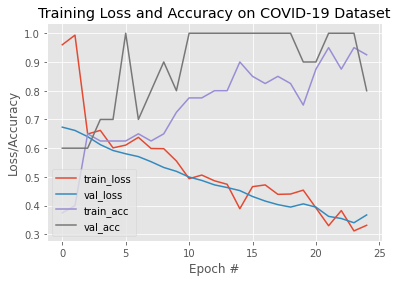